In [8]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


from lvmdap.dap_tools import list_columns,read_DAP_file,map_plot_DAP
from lvmdap.dap_tools import plot_spectra,plot_spec,read_tab_EL
from lvmdap.dap_tools import read_coeffs_RSP
from matplotlib import use as mpl_use
from astropy.io import fits, ascii
from astropy.table import Table, join,QTable
from astropy.table import unique as tab_unique
from astropy.cosmology import WMAP9 as cosmo
#mpl_use('Agg')

%matplotlib inline
from matplotlib import rcParams as rc
rc.update({'font.size': 19,\
           'font.weight': 900,\
           'text.usetex': True,\
           'path.simplify'           :   True,\
           'xtick.labelsize' : 19,\
           'ytick.labelsize' : 19,\
#           'xtick.major.size' : 3.5,\
#           'ytick.major.size' : 3.5,\
           'axes.linewidth'  : 2.0,\
               # Increase the tick-mark lengths (defaults are 4 and 2)
           'xtick.major.size'        :   6,\
           'ytick.major.size'        :   6,\
           'xtick.minor.size'        :   3,\
           'ytick.minor.size'        :   3,\
           'xtick.major.width'       :   1,\
           'ytick.major.width'       :   1,\
           'lines.markeredgewidth'   :   1,\
           'legend.numpoints'        :   1,\
           'xtick.minor.width'       :   1,\
           'ytick.minor.width'       :   1,\
           'legend.frameon'          :   False,\
           'legend.handletextpad'    :   0.3,\
           'font.family'    :   'serif',\
           'mathtext.fontset'        :   'stix',\
           'axes.facecolor' : "w",\
           
          })



In [9]:
DIR='/disk-a/sanchez/LVM/LVM/ver_231113/output_dap/'
label='m_int_test'
out_file_fit=f'{DIR}/{label}.output.fits'
out_file_ps=f'{DIR}/{label}.rsp.txt'
out_file_coeffs=f'{DIR}/{label}.coeffs.txt'
output_path='figs/'
outfile='test.pdf'
tab_el=read_tab_EL('_legacy/emission_lines_long_list.LVM')
tab_coeffs=read_coeffs_RSP(coeffs_file=out_file_coeffs)

rsp_file='/disk-a/sanchez/LVM/LVM/ver_231113/mstar-stlib-cl-108.fits.gz'
rsp_hdu=fits.open(rsp_file)
rsp_hdu.info()


Filename: /disk-a/sanchez/LVM/LVM/ver_231113/mstar-stlib-cl-108.fits.gz
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  SPECTRA       1 PrimaryHDU      13   (6351, 108)   float32   
  1  PARAMETERS    1 BinTableHDU     29   108R x 10C   [D, E, E, E, E, E, E, E, E, E]   
  2  ERROR         1 ImageHDU        14   (6351, 108)   float32   
  3  ORG_PARAM     1 BinTableHDU     31   1235R x 11C   [K, E, E, E, E, E, E, E, E, E, J]   
  4  PDF_TEFF_LOGG    1 ImageHDU        17   (100, 100, 108)   float64   
  5  PDF_TEFF_MET    1 ImageHDU        17   (100, 100, 108)   float64   
  6  PDF_TEFF_ALPHAM    1 ImageHDU        17   (100, 100, 108)   float64   
  7  PDF_MET_ALPHAM    1 ImageHDU        17   (100, 100, 108)   float64   
  8  PDF_MET_LOGG    1 ImageHDU        17   (100, 100, 108)   float64   
  9  PDF_LOGG_MET    1 ImageHDU        17   (100, 100, 108)   float64   


Text(0, 0.5, '[$\\alpha$/Fe]')

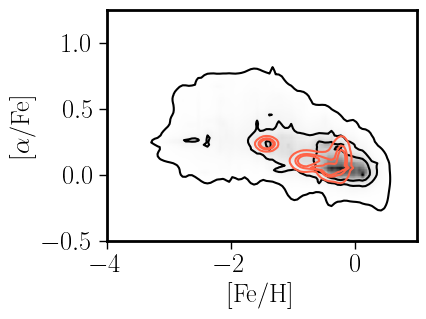

In [53]:
hdu_now=rsp_hdu['PDF_TEFF_LOGG']
xlabel=r'log(T$_{\rm eff}$)'
ylabel=r'log(g)'

hdu_now=rsp_hdu['PDF_MET_ALPHAM']
xlabel=r'[Fe/H]'
ylabel=r'[$\alpha$/Fe]'


(nz,ny,nx)=hdu_now.data.shape
xLims=(hdu_now.header['CRVAL1'],hdu_now.header['CRVAL1']+nx*hdu_now.header['CDELT1'])
yLims=(hdu_now.header['CRVAL2'],hdu_now.header['CRVAL2']+ny*hdu_now.header['CDELT2'])
extent=(xLims[0], xLims[1], yLims[0], yLims[1])
n_fib = 0
mask_fib = (tab_coeffs['id_fib']==n_fib)
tab_now=tab_coeffs[mask_fib]
den_map=np.average(hdu_now.data,axis=0)
den_map_few=np.average(hdu_now.data,weights=tab_now['COEFF'],axis=0)



conts=[0.99,0.65,0.40,0.0]
fig, ax = plt.subplots(figsize=(4,3))
ax.imshow(den_map,extent=extent,cmap='Greys',origin='lower', aspect='auto')

vals=[]
levels=[]
den_map_p = den_map/np.max(den_map)
for idx,cuts in enumerate(np.arange(0.00,1.0,0.01)):
    mask_now= den_map_p>cuts
    levels.append(cuts)
    vals.append(den_map_p[mask_now].sum()/den_map_p.sum())
vals_cont=np.array(conts)
levels_cont=np.interp(vals_cont,np.array(levels),np.array(vals))
#ax.imshow(den_map_p,cmap='Greys',origin='lower', extent=extent)
p_cont=ax.contour(den_map_p,levels_cont,colors='k',origin='lower', extent=extent)


vals=[]
levels=[]
den_map_p = den_map_few/np.max(den_map_few)
for idx,cuts in enumerate(np.arange(0.00,1.0,0.01)):
    mask_now= den_map_p>cuts
    levels.append(cuts)
    vals.append(den_map_p[mask_now].sum()/den_map_p.sum())
vals_cont=np.array(conts)
levels_cont=np.interp(vals_cont,np.array(levels),np.array(vals))

p_cont_few=ax.contour(den_map_p,levels_cont, colors='tomato',origin='lower', extent=extent)
ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)

#print(nx,ny)

In [6]:
tab

id_fib,rsp,TEFF,LOGG,META,ALPHAM,COEFF,Min.Coeff,log(M/L),AV,N.Coeff,Err.Coeff
int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
0,0,3.9833,3.8164,-2.2742,0.2407,0.0,0.0,11.1034,0.0,0.0,0.0
0,1,4.0051,3.5033,-1.0112,0.3762,0.0,0.0,11.7968,0.0,0.0,0.0
0,2,3.9988,3.7561,0.0265,-0.0907,0.0,0.0,13.3728,0.0,0.0,0.0
0,3,3.9668,3.3938,-0.9561,0.3153,0.0,0.0,12.4685,0.0,0.0,0.0
0,4,3.9912,3.8512,-2.4725,-0.0788,0.0,0.0,12.0442,0.0,0.0,0.0
0,5,3.9354,2.8466,-0.7919,0.1576,0.0,0.0,11.8734,0.0,0.0,0.0
0,6,3.9648,2.9568,-2.5571,0.0433,0.0,0.0,11.024,0.0,0.0,0.0
0,7,3.9178,2.8502,-0.1434,0.4301,0.0,0.0,12.4419,0.0,0.0,0.0
0,8,3.9814,3.2205,-1.589,0.3911,0.0,0.0,13.76,0.0,0.0,0.0
